#### Parte 1: Implementar un  árbol de búsqueda binaria

Comenzaremos implementando la estructura de datos de un árbol de búsqueda binaria en Python. Por favor, lee cuidadosamente las descripciones de las funciones y complétalas de acuerdo a lo indicado. Debes estar familiarizado con los objetos en Python.

In [1]:
class Node:
    # Implementa un nodo del árbol de búsqueda binaria.
    # Constructor para un nodo con una clave y un padre dado.
    # El padre puede ser None para un nodo raíz.
    def __init__(self, key, parent=None):
        self.key = key
        self.parent = parent
        self.left = None  # Establece que el hijo izquierdo es None
        self.right = None # Establece que el hijo derecho es None
        # Asegurate de que el puntero izquierdo/derecho del padre
        # apunte al nodo recién creado.
        if parent is not None:
            if key < parent.key:
                assert(parent.left is None), 'El padre ya tiene un hijo izquierdo -- no se puede crear el nodo'
                parent.left = self
            else:
                assert key > parent.key, 'La clave es igual a la clave del padre. No se permiten claves duplicadas en un BST ya que rompe algunos algoritmos.'
                assert(parent.right is None), 'El padre ya tiene un hijo derecho -- no se puede crear el nodo'
                parent.right = self

    # Función de utilidad que recorre hacia la izquierda hasta encontrar el descendiente más a la izquierda
    def get_leftmost_descendant(self):
        if self.left is not None:
            return self.left.get_leftmost_descendant()
        else:
            return self

    # Completa el algoritmo de búsqueda a continuación
    # Puedes llamar a search recursivamente en el hijo izquierdo o derecho según corresponda.
    # Si la búsqueda tiene éxito: devuelve una tupla (True, nodo) donde nodo es el nodo del árbol con la clave buscada.
    # Ten en cuenta que si la búsqueda falla en encontrar la clave, debe devolver una tupla (False, nodo),
    # donde nodo sería el padre si se fuera a insertar la clave posteriormente.
    def search(self, key):
        if self.key == key:
            return (True, self)
        # Código a completar
        if self.key < key:
            if self.right is None:
                return (False, self)
            return self.right.search(key)
        else:
            if self.left is None:
                return (False, self)
            return self.left.search(key)
        return (False, self)
        # COMPLETADO

    # Completa el algoritmo de inserción a continuación
    # Primero, busca la posición donde se insertará la clave, encontrando
    # el nodo padre correspondiente para la nueva clave.
    # Crea un nuevo nodo con esa clave e insertarlo.
    # Retorna None si la clave ya existe en el árbol.
    # Retorna el nuevo nodo correspondiente a la clave insertada en caso contrario.
    def insert(self, key):
        # Código a completar
        exists, parent = self.search(key)
        if exists:
            return None
        if parent.key < key:
            node = Node(key, parent)
        else:
            node = Node(key, parent)
        return node
        # COMPLETADO

    # Completa el algoritmo para calcular la altura del árbol
    # La altura de un nodo cuyos hijos son ambos None se define como 1.
    # La altura de cualquier otro nodo es 1 + el máximo de la altura de sus hijos.
    # Retorna un número que represente la altura.
    def height(self):
        # Código a completar
        if self.left is None and self.right is None:
            return 1
        if self.left is None:
            return 1 + self.right.height()
        if self.right is None:
            return 1 + self.left.height()
        return 1 + max(self.left.height(), self.right.height())
        # COMPLETADO

    # Escribe un algoritmo para eliminar una clave en el árbol.
    # Primero, encuentra el nodo en el árbol con la clave.
    # Se recomienda dibujar diagramas para visualizar los siguientes casos antes de programar.
    # Caso 1: ambos hijos del nodo son None
    #   -- En este caso, la eliminación es sencilla: simplemente determinar si el nodo con la clave
    #      es el hijo izquierdo o derecho del padre y establecer ese puntero en None en el nodo padre.
    # Caso 2: uno de los hijos es None y el otro no lo es.
    #   -- Reemplaza el nodo por su único hijo. Es decir,
    #      modifica el padre del hijo para que sea el padre del nodo que se elimina.
    #      además, ajusta el puntero izquierdo/derecho del padre según corresponda.
    # Caso 3: ambos hijos del nodo existen.
    #    -- Primero, encuentra su sucesor (ir un paso a la derecha y luego todo lo posible a la izquierda).
    #    -- La función get_leftmost_descendant puede ser útil aquí.
    #    -- Reemplaza la clave del nodo por la de su sucesor.
    #    -- Elimina el nodo sucesor.
    # Retorno: no se especifica un valor de retorno
    def delete(self, key):
        (found, node_to_delete) = self.search(key)
        assert(found == True), f"La clave a eliminar: {key} no existe en el árbol"
        # Nodo sin hijos
        if node_to_delete.height() == 1:
            # Eliminar árbol
            if node_to_delete.parent is None:
                node_to_delete = None
                return
            parent = node_to_delete.parent
            if parent.left is node_to_delete:
                parent.left = None
            else:
                parent.right = None
            node_to_delete = None
            return
        # Nodo con un hijo
        # El caso en el que ambos hijos sean None ya es atrapado por el condicional anterior
        if node_to_delete.left is None or node_to_delete.right is None:
            # Nodo raíz
            if node_to_delete.parent is None:
                node_to_delete = None
                return
            parent = node_to_delete.parent
            child = node_to_delete.left
            if child is None:
                child = node_to_delete.right
            if parent.left is node_to_delete:
                parent.left = child
            else:
                parent.right = child
            return
        successor = node_to_delete.right.get_leftmost_descendant()
        node_to_delete.key = successor.key
        s_parent = successor.parent
        if s_parent.left is successor:
            s_parent.left = None
        else:
            s_parent.right = None
        return

In [2]:
t1 = Node(25, None)
t2 = Node(12, t1)
t3 = Node(18, t2)
t4 = Node(40, t1)

print('-- Probando la construcción básica de nodos (código proporcionado originalmente) --')
assert(t1.left == t2), 'prueba 1 falló'
assert(t2.parent == t1), 'prueba 2 falló'
assert(t2.right == t3), 'prueba 3 falló'
assert(t3.parent == t2), 'prueba 4 falló'
assert(t1.right == t4), 'prueba 5 falló'
assert(t4.left is None), 'prueba 6 falló'
assert(t4.right is None), 'prueba 7 falló'
# El árbol debería ser:
#             25
#            /  \
#         12     40
#           \
#           18

print('-- Probando búsqueda --')
(b, found_node) = t1.search(18)
assert(b and found_node.key == 18), 'prueba 8 falló'
(b, found_node) = t1.search(25)
assert(b and found_node.key == 25), 'prueba 9 falló -- debes encontrar el nodo con clave 25, que es la raíz'
(b, found_node) = t1.search(26)
assert((not b)), 'prueba 10 falló'
assert(found_node.key == 40), 'prueba 11 falló -- debes retornar el nodo hoja que sería el padre si se insertara la clave faltante'

print('-- Probando inserción --')
ins_node = t1.insert(26)
assert(ins_node.key == 26), 'prueba 12 falló'
assert(ins_node.parent == t4), 'prueba 13 falló'
assert(t4.left == ins_node), 'prueba 14 falló'

ins_node2 = t1.insert(33)
assert(ins_node2.key == 33), 'prueba 15 falló'
assert(ins_node2.parent == ins_node), 'prueba 16 falló'
assert(ins_node.right == ins_node2), 'prueba 17 falló'

print('-- Probando altura --')

assert(t1.height() == 4), 'prueba 18 falló'
assert(t4.height() == 3), 'prueba 19 falló'
assert(t2.height() == 2), 'prueba 20 falló'

print('¡Pasaron todas las pruebas!')

-- Probando la construcción básica de nodos (código proporcionado originalmente) --
-- Probando búsqueda --
-- Probando inserción --
-- Probando altura --
¡Pasaron todas las pruebas!


In [3]:
# Probando la eliminación
t1 = Node(16, None)
# Inserta los nodos de la lista
lst = [18, 25, 10, 14, 8, 22, 17, 12]
for elt in lst:
    t1.insert(elt)

# El árbol debería tener la siguiente forma:
#               16
#            /     \
#          10      18
#        /  \     /  \
#       8   14   17  25
#          /         /
#         12        22


# Probemos los tres casos de eliminación.
# Caso 1: eliminar el nodo 8
# El nodo 8 no tiene hijos (hoja).
t1.delete(8)  # después de eliminar, ambos hijos deben ser None.
(b8, n8) = t1.search(8)
assert(not b8), 'Prueba A: la eliminación no eliminó el nodo.'
(b, n) = t1.search(10)
assert(b), 'Prueba B falló: la búsqueda no funciona'
assert(n.left is None), 'Prueba C falló: el nodo 8 no fue eliminado correctamente.'

# Probemos eliminar el nodo 14, cuyo hijo derecho es None.
# n aún apunta al nodo 10 después de eliminar 8.
# Asegurémonos de que su hijo derecho sea 14.
assert(n.right is not None), 'Prueba D falló: el nodo 10 debería tener un hijo derecho, el nodo 14'
assert(n.right.key == 14), 'Prueba E falló: el nodo 10 debería tener el nodo 14 como hijo derecho'

# Eliminemos el nodo 14
t1.delete(14)
(b14, n14) = t1.search(14)
assert(not b14), 'Prueba F: La eliminación del nodo 14 falló, aún existe en el árbol.'
(b, n) = t1.search(10)
assert(n.right is not None), 'Prueba G falló: la eliminación del nodo 14 no se manejó correctamente'
assert(n.right.key == 12), f'Prueba H falló: la eliminación del nodo 14 no se manejó correctamente: {n.right.key}'

# Eliminemos el nodo 18 del árbol.
# Debe ser reemplazado por el nodo 22.

t1.delete(18)
(b18, n18) = t1.search(18)
assert(not b18), 'Prueba I: La eliminación del nodo 18 falló'
assert(t1.right.key == 22), 'Prueba J: Falló el reemplazo del nodo con su sucesor.'
assert(t1.right.right.left is None), 'Prueba K: Falló la eliminación correcta del nodo sucesor (hoja).'

print('¡Todas las pruebas pasaron!')

¡Todas las pruebas pasaron!


#### Parte 2: Altura de árboles de búsqueda binaria aleatorios

La altura de un árbol de búsqueda binaria depende del orden en que se insertan las claves. En este problema, investigamos una curiosa relación entre la profundidad recursiva del algoritmo de quicksort en un arreglo de n elementos y la profundidad de los árboles de búsqueda binaria.

Supongamos que deseamos insertar las claves del conjunto $\{0, \ldots, n-1\}$ en un árbol de búsqueda binaria. Responda las siguientes preguntas.

**Pregunta 1**
Proporciona ejemplos de secuencias de inserción tales que el árbol resultante tenga la peor altura posible de $n$.

##### Respuesta

Se tienen que insertar desde el primer elemento en orden ascendente o desde el último en orden descendente. Esto causará que el árbol degenere en una lista enlazada de tamaño n.

Si se inserta desde el 0, luego 1, luego 2 y en adelante, el árbol tendría la siguiente forma:

0 -> 1 -> 2 -> 3 -> 4 ... -> n-1

Solo crecería por la derecha y ningún nodo tendría un hijo izquierdo. Esencialmente, sería una lista enlazada.

**Pregunta 2**

Sea s1,...,sj una secuencia de $j \geq 1$ claves insertadas, en la cual cada si es un número entre 0 y n-1 y cada número en la secuencia es único.

Demuestra que si la secuencia produce un árbol de altura j (el peor caso) entonces s1 debe ser el elemento mínimo o máximo de la secuencia.

**Pista:** Una demostración por contradicción funcionará. Primero observa que s1 será la raíz del árbol obtenido. Demuestra que si s1 no es el mínimo o el máximo, el árbol resultante tendrá una altura < j.


##### Respuesta
El árbol tiene una altura j, entonces necesariamente s1 es la raíz de este. Por contradicción, asumiendo que algún si > sj sea la raíz, entonces todos sus hijos tendrán que ser o mayor o menor que este. Es decir, todos sus hijos tienen que ser s1....s(i-1) o s(i+1)...s(j). Sin embargo, como es un árbol de altura máxima, entonces necesariamente si debe ser o el primer elemento o el último elemento para que la altura del árbol sea j, el tamaño de la secuencia. Entonces, este o debe ser s1 o sj. En caso sea s1, entonces este puede ser o el mínimo o el máximo elemento de la secuencia para cumplir con la condición de altura máxima. De igual modo, si la raíz es sj, s1 todavía puede ser o el mínimo o máximo de la secuencia, dependiendo de si el árbol se expande por la derecha o izquierda.

**Pregunta 3**
Utilizando la implementación del árbol de búsqueda binaria de la parte 1, completa la función calculateAverageDepth(n, numTrials) que realiza el siguiente experimento numTrials veces.

Cada experimento se realiza de la siguiente forma:

- Toma una lista de números del 0 al n-1.
- Mezcla aleatoriamente la lista: utilice la función random.shuffle o (avanzado) escriba su propio método de mezclar.
- Inserta en un árbol los elementos de la lista mezclada en orden.
- Calcula y retornar la altura del árbol resultante.

Finalmente, se realiza el experimento numTrials veces y se toma el promedio de todas las alturas obtenidas.

Luego se graficará la altura promedio de un árbol de búsqueda binaria aleatorio en función de n.

In [4]:
import random

# 1. Crea una lista de números del 0 al n-1
# 2. Mezcla aleatoriamente la lista
# 3. Inserta en un árbol los elementos de la lista mezclada en orden.
# 4. Devuelve la altura del árbol resultante.
def run_single_experiment(n):
    ## Codigo a completar
    normal_list = list(range(n))
    random.shuffle(normal_list)
    shuffled_list = normal_list
    root = Node(shuffled_list[0], None)
    for i in range(1, n):
        root.insert(shuffled_list[i])
    return root.height()

def run_multiple_trials(n, numTrials):
    lst_of_depths = [run_single_experiment(n) for j in range(numTrials)]
    return (sum(lst_of_depths)/len(lst_of_depths), lst_of_depths)

Profundidad promedio para 64 = 11.675
Profundidad promedio para 128 = 14.168
¡Todas las pruebas pasaron!


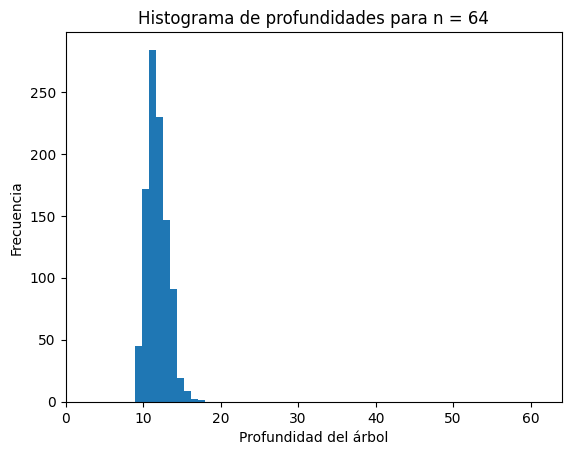

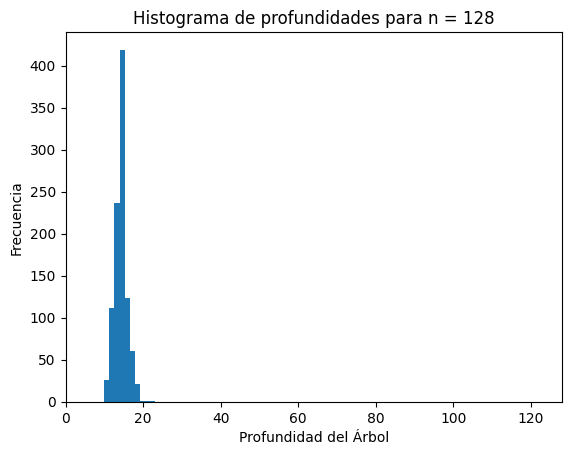

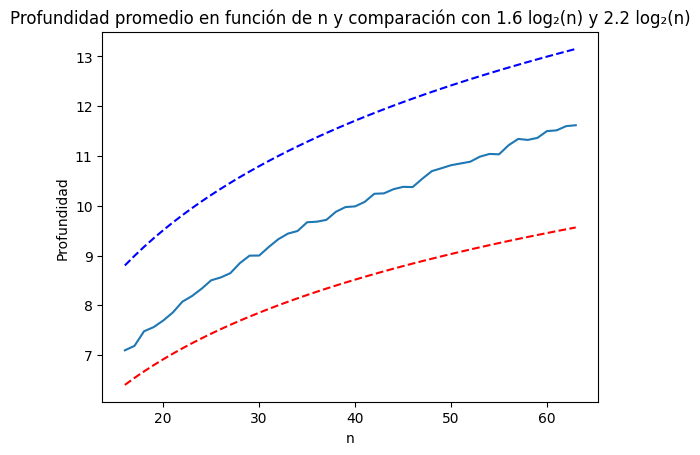

In [5]:
import math
import matplotlib.pyplot as plt

%matplotlib inline

(avg64, lst_of_results_64) = run_multiple_trials(64, 1000)
plt.hist(lst_of_results_64)
plt.xlim(0, 64)
plt.xlabel('Profundidad del árbol')
plt.ylabel('Frecuencia')
plt.title('Histograma de profundidades para n = 64')
print(f'Profundidad promedio para 64 = {avg64}')
assert(avg64 <= 12 and avg64 >= 8)

plt.figure()
(avg128, lst_of_results_128) = run_multiple_trials(128, 1000)
print(f'Profundidad promedio para 128 = {avg128}')
assert(avg128 <= 16 and avg128 >= 12)

plt.hist(lst_of_results_128)
plt.xlim(0, 128)
plt.xlabel('Profundidad del Árbol')
plt.ylabel('Frecuencia')
plt.title('Histograma de profundidades para n = 128')

nmin = 16
nmax = 64

lst_of_average_depths = [run_multiple_trials(j, 1000)[0] for j in range(nmin, nmax)]
plt.figure()
l1 = plt.plot(range(nmin, nmax), lst_of_average_depths, label='Prof. Promedio')
plt.xlabel('n')
plt.ylabel('Profundidad')
l2 = plt.plot(range(nmin, nmax), [1.6 * math.log(j)/math.log(2) for j in range(nmin, nmax)], '--r', label='1.6 log₂(n)')
l3 = plt.plot(range(nmin, nmax), [2.2 * math.log(j)/math.log(2) for j in range(nmin, nmax)], '--b', label='2.2 log₂(n)')
# plt.legend()
plt.title('Profundidad promedio en función de n y comparación con 1.6 log₂(n) y 2.2 log₂(n)')
print('¡Todas las pruebas pasaron!')


Los histogramas y gráficos deben mostrar un hecho sorprendente: aunque la peor altura puede ser tan grande como $n$, la altura de un árbol de búsqueda binaria aleatorio se concentra entre $1.8\log_2(n)$ y $2.2\log_2(n)$.

Esto es interesante, ya que si se garantiza que las claves se insertan de forma aleatoria, un BST puede estar bastante balanceado con muy alta probabilidad. Existen muchas ideas ingeniosas para lograr esto en la práctica, incluso si el usuario no inserta las claves aleatoriamente. Una forma es mediante _treaps_, que veremos en clase.

**Extensiones**

- Investiga y demuestra que, para un BST construido con inserciones en orden aleatorio, la altura esperada es $O(\log n)$. Puedes incluso analizar el comportamiento en el peor caso y comparar con el caso promedio.
- Formaliza y demuestra que las operaciones de inserción y eliminación mantienen la propiedad fundamental del BST (es decir, para cada nodo, todos los nodos en el subárbol izquierdo son menores y los del subárbol derecho son mayores).
- Demuestra teóricamente cómo la asignación aleatoria de prioridades en un treap conduce a un árbol balanceado en promedio. Analiza la distribución de la altura y compárala con la de un BST no balanceado.
- Considera la extensión de un BST a un árbol de orden estadístico, en el cual cada nodo almacena el tamaño de su subárbol. Esto te permite responder consultas del tipo "¿cuál es el k-ésimo elemento más pequeño?" en tiempo logarítmico.



Tus respuestas

**Implementaciones**

- Completa las funciones de **búsqueda**, **inserción**, **cálculo de la altura** y **eliminación**. Agregar recorridos (in-order, pre-order, post-order) y funciones de impresión para visualizar la estructura del árbol.
  
- Implementa y compara algoritmos de balanceo (como los árboles AVL o árboles Rojo-Negro) que realizan rotaciones para mantener el árbol balanceado después de cada inserción o eliminación.

- Implementa un treap completo, donde cada nodo tiene una clave y una prioridad. Realiza operaciones de **split** y **merge**, y estudia cómo estas operaciones permiten mantener el balance probabilístico del árbol.Compara el rendimiento de operaciones en el treap con el BST tradicional en simulaciones experimentales.

- Realiza experimentos similares al que se muestra en el código, variando el número de nodos y estudiando la distribución de las alturas del árbol. Compara la eficiencia en tiempo de búsqueda, inserción y eliminación entre BST, treaps y otras estructuras balanceadas. Implementa visualizaciones gráficas (por ejemplo, histogramas o gráficos de dispersión) para analizar la relación entre el tamaño del árbol y su altura.



In [6]:
## Tus respuestas